In [1]:
import numpy as np
import scipy.constants as con
import matplotlib.pyplot as plt
import BOPackage

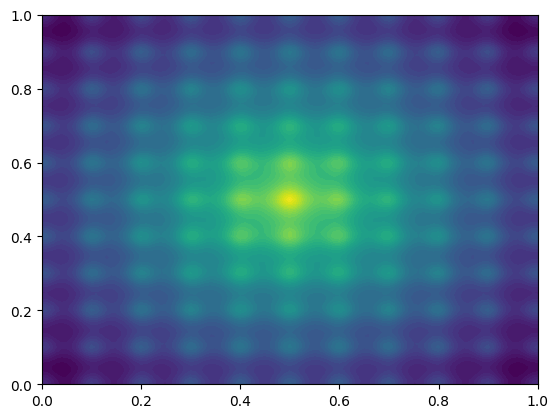

In [2]:
def ObjectiveFunction(X):
    x1 = 10 * (X[0] - 0.5)
    x2 = 10 * (X[1] - 0.5)

    return - (-20.0 * np.exp(-0.2 * np.sqrt(0.5 * (x1**2 + x2**2))) - np.exp(0.5 * (np.cos(2 * con.pi * x1) + np.cos(2 * con.pi * x2))) + con.e + 20)
 

X1 = np.linspace(0, 1, 101, endpoint=True)
X2 = np.linspace(0, 1, 101, endpoint=True)

# Create the meshgrid
X1_grid, X2_grid = np.meshgrid(X1, X2)

# Combine the grid into an n**2 x 2 matrix
candidate_x = np.vstack([X1_grid.ravel(), X2_grid.ravel()]).T

result = np.empty([len(X1), len(X2)])

for i, x1 in enumerate(X1):
    for j, x2 in enumerate(X2):
        result[i, j] = ObjectiveFunction([x1, x2])

plt.contourf(X1, X2, result, levels=50)

In [8]:
"""
Configure the optimiser.
"""
Kernel = BOPackage.RBF_Kernel
length_scale = 0.1

AcquisitionFunction = BOPackage.UCB
max_kappa = 4
min_kappa = 0.1

bounds = np.array([[0, 1], [0, 1]])
n_samples = 100

In [9]:
bo = BOPackage.BO(KernelFunction=BOPackage.RBF_Kernel, 
                  length_scale=length_scale, 
                  AcquisitionFunction=BOPackage.UCB, 
                  bounds=bounds, 
                  n_samples=n_samples,
                  #log_path=log_path,
                  random_seed=78)

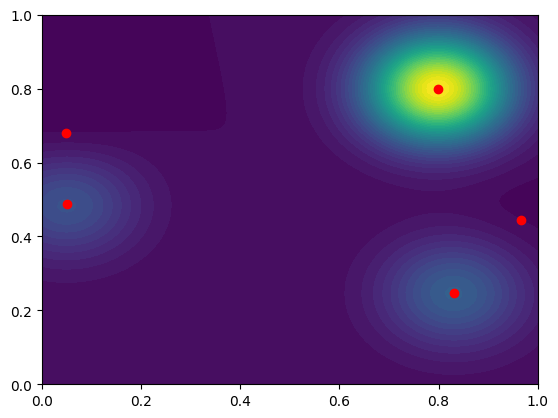

In [10]:
raw_X = bo.GetRandomXBatch(batch_size=5)

raw_Y = np.empty([len(raw_X), 1])
for i, x in enumerate(raw_X):
    raw_Y[i, 0] = ObjectiveFunction(x)
    
bo.UpdateData(raw_X, raw_Y)

mean, variance = bo.PredictMeanVariance(candidate_x)

plt.contourf(X1, X2, mean.reshape(len(X1), len(X2)), levels=50)
plt.scatter(bo.X_data[:, 0], bo.X_data[:, 1], color='red')

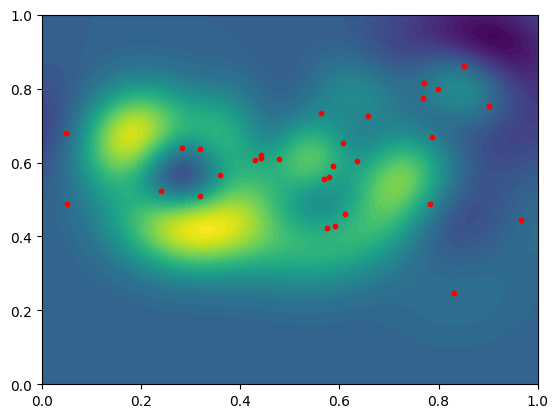

In [11]:
iterations = 5
for i in range(iterations):
    raw_X = bo.GetNextXBatch(batch_size=5, max_kappa=max_kappa, min_kappa=min_kappa)
    raw_Y = np.empty([len(raw_X), 1])
    for i, x in enumerate(raw_X):
        raw_Y[i, 0] = ObjectiveFunction(x)

    bo.UpdateData(raw_X, raw_Y)

mean, variance = bo.PredictMeanVariance(candidate_x)
plt.contourf(X1, X2, mean.reshape(len(X1), len(X2)), levels=50)
plt.scatter(bo.X_data[:, 0], bo.X_data[:, 1], color='red', s=10)

In [15]:
bo.X_data
# np.concatenate((bo.X_data, bo.X_data), axis=0)
np.vstack([bo.X_data, bo.X_data])

array([[0.04818123, 0.68096301],
       [0.79869607, 0.80010859],
       [0.96529725, 0.44401982],
       [0.83123488, 0.24656763],
       [0.05027788, 0.48743178],
       [0.76770206, 0.77523496],
       [0.77153466, 0.81518379],
       [0.85160086, 0.86221801],
       [0.78605187, 0.66903976],
       [0.65828873, 0.72540385],
       [0.60815715, 0.65331934],
       [0.90138763, 0.75223355],
       [0.56353937, 0.73435153],
       [0.63613848, 0.60295599],
       [0.58777412, 0.59133619],
       [0.61212494, 0.46186477],
       [0.56871637, 0.5545284 ],
       [0.57886495, 0.56066663],
       [0.59075816, 0.42915178],
       [0.57524456, 0.42295835],
       [0.4424539 , 0.612629  ],
       [0.47755598, 0.60905742],
       [0.42986069, 0.6070046 ],
       [0.44150832, 0.62086964],
       [0.78304233, 0.48642886],
       [0.35918968, 0.56629004],
       [0.28183118, 0.63920921],
       [0.31925045, 0.51016237],
       [0.31978382, 0.63730311],
       [0.24009115, 0.52340445],
       [0.

In [16]:
np.shape(bo.X_data)

(30, 2)